## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part B)

In [4]:
dataset_name = 'shanghai_tech/part_b'
experiment_name = 'sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_01/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_02/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_03/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_04/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_05/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_06/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_07/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantitative/epoch_08/results.csv
./shanghai_tech/part_b/sigma_10_loss_logcosh_full_img_epochs_50_lr_1e-4/results/quantita

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

val_mae = get_results(res_list, metric='MAE', split='val')
test_mae = get_results(res_list, metric='MAE', split='test')
best_epoch = np.argmin(val_mae)

print(f'epoch: {best_epoch + 1},  val_mae: {val_mae[best_epoch]}')
print(f'epoch: {best_epoch + 1}, test_mae: {test_mae[best_epoch]}')

[47.028999999999996, 74.694, 39.592, 31.443, 29.334, 72.065, 23.05, 27.364, 52.928999999999995, 26.151999999999997, 50.012, 19.169, 30.09, 21.628, 19.009, 26.17, 17.352999999999998, 28.138, 28.37, 22.855999999999998, 15.119000000000002, 17.494, 12.187999999999999, 14.220999999999998, 13.254000000000001, 11.359000000000002, 14.062000000000001, 10.966, 8.087, 12.988, 10.683, 20.616999999999997, 39.759, 19.704, 8.277999999999999, 7.824, 19.285, 7.537000000000001, 10.923, 12.764000000000001, 10.013, 30.939, 4.9830000000000005, 16.875999999999998, 9.845, 12.802999999999999, 10.411, 5.779, 13.339, 10.831]
[44.478, 69.593, 33.505, 26.509, 27.342, 73.492, 21.85, 23.353, 48.16, 22.98, 45.193999999999996, 17.92, 26.129, 22.844, 17.748, 23.52, 16.958, 26.14, 32.503, 22.785, 16.968, 18.711, 16.023, 16.774, 15.918, 16.639, 17.933, 15.887, 13.556, 17.457, 14.501, 25.168000000000003, 41.976000000000006, 22.462, 15.672, 15.203, 24.355, 14.964, 17.903, 16.901, 15.435, 37.001999999999995, 14.534, 21.141

In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = (1 + np.arange(len(train_res)))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

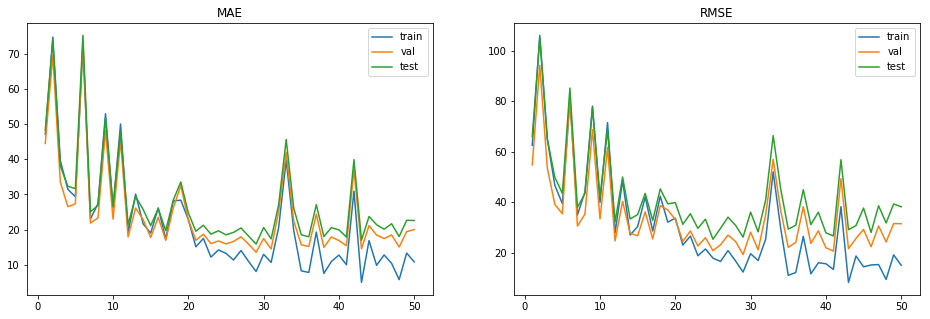

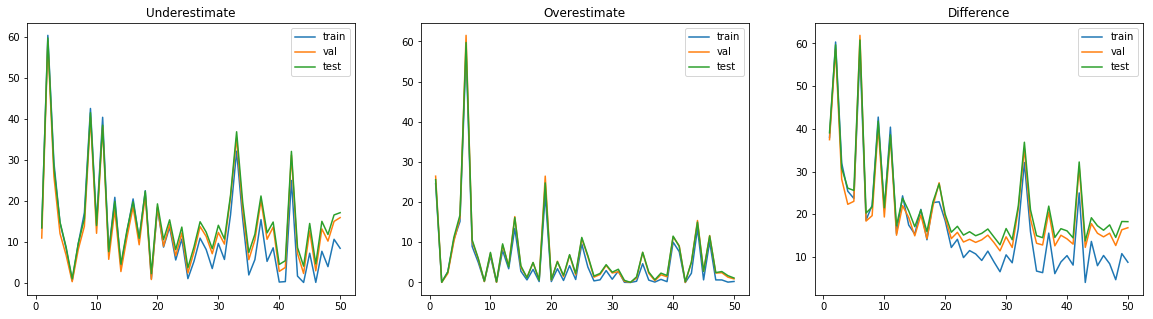

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)